In [42]:
import numpy as np
rand = np.random.RandomState(42)
x = rand.rand(10,2)
x

array([[0.37454012, 0.95071431],
       [0.73199394, 0.59865848],
       [0.15601864, 0.15599452],
       [0.05808361, 0.86617615],
       [0.60111501, 0.70807258],
       [0.02058449, 0.96990985],
       [0.83244264, 0.21233911],
       [0.18182497, 0.18340451],
       [0.30424224, 0.52475643],
       [0.43194502, 0.29122914]])

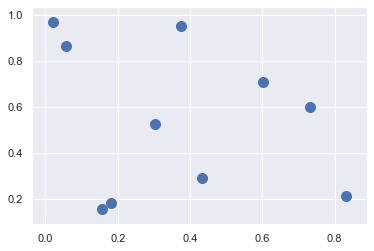

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
plt.scatter(x[:,0],x[:,1],s=100)

In [44]:
#在坐标系中计算每对点的差值
differences = x[:,np.newaxis,:]-x[np.newaxis,:,:]
differences.shape

(10, 10, 2)

In [45]:
#求出差值的平方
sq_differences = differences**2
sq_differences.shape

(10, 10, 2)

In [46]:
#将差值求和获得平方距离
dist_sq = sq_differences.sum(-1)
dist_sq.shape

(10, 10)

In [47]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [48]:
nearest = np.argsort(dist_sq,axis=1)
print(nearest)
#输出的列表最左边一列为最近邻(自己)的索引，第二列为第二近邻的索引，以此类推

[[0 3 4 5 8 1 9 7 2 6]
 [1 4 6 9 8 0 7 3 2 5]
 [2 7 9 8 6 4 3 1 0 5]
 [3 5 0 8 4 9 7 2 1 6]
 [4 1 0 8 9 6 3 5 7 2]
 [5 3 0 8 4 9 1 7 2 6]
 [6 1 9 4 8 7 2 0 3 5]
 [7 2 9 8 6 4 1 3 0 5]
 [8 9 4 7 2 3 0 1 5 6]
 [9 8 7 2 6 1 4 0 3 5]]


In [49]:
#求三个最近邻
K = 3
nearest_partition = np.argpartition(dist_sq,K+1,axis=1)#第一列为自己所以K+1
nearest_partition

array([[3, 0, 4, 5, 8, 9, 1, 7, 2, 6],
       [1, 4, 6, 9, 8, 0, 7, 3, 5, 2],
       [2, 7, 9, 8, 6, 4, 5, 1, 3, 0],
       [5, 0, 8, 3, 4, 1, 6, 7, 2, 9],
       [1, 4, 0, 8, 9, 6, 2, 7, 5, 3],
       [5, 0, 8, 3, 4, 1, 6, 7, 2, 9],
       [1, 9, 6, 4, 8, 7, 2, 0, 5, 3],
       [7, 2, 9, 8, 6, 4, 5, 1, 3, 0],
       [8, 9, 4, 7, 2, 3, 0, 1, 5, 6],
       [8, 7, 9, 2, 6, 1, 4, 5, 3, 0]], dtype=int64)

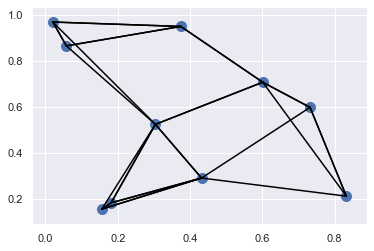

In [50]:
plt.scatter(x[:,0],x[:,1],s=100)
K = 3
for i in range(x.shape[0]):#x第一维的元素个数
    for j in nearest_partition[i,:K+1]:
        plt.plot(*zip(x[j],x[i]),color='black')